# codelab 02: Image Processing Walkthrough

## Part 1: Load data

In [1]:
from skimage.io import imread

filepath = r'..\example_images\example_cells.tif'
img = imread(filepath)

Loaded array is of type: <class 'numpy.ndarray'>
Loaded array has shape: (930, 780)
Loaded values are of type: uint8


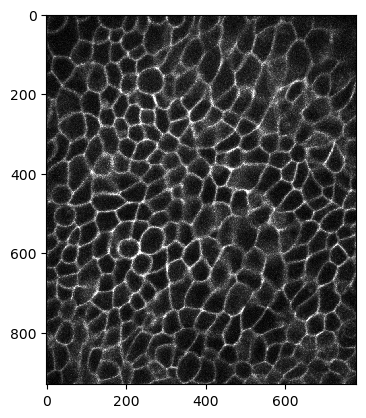

In [2]:
print("Loaded array is of type:", type(img))
print("Loaded array has shape:", img.shape)
print("Loaded values are of type:", img.dtype)
import matplotlib.pyplot as plt
plt.imshow(img, interpolation='none', cmap='gray')

## Part 2: Preprocessing

### Sec01: Smoothing

In [ ]:
# Import the image processing module scipy.ndimage as ndi
import ...

# Define the sigma value for the Gaussian filter
sigma = 3
# Apply a Gaussian filter to the image
img_smooth = ...

# Show the original and the smoothed image
plt.figure()
plt.imshow(img_smooth, interpolation='none', cmap='gray')

### Sec02: Thresholding

In [ ]:
# Define the threshold level
thresh = ...
# Apply thresholding
mem = ...
# Check the data type of mem
...

In [ ]:
plt.imshow(mem, interpolation='none', cmap='gray')

In [ ]:
# Try automatic thresholding
from ...

thresh = ...
mem = ...
plt.figure()
plt.imshow(mem, interpolation='none', cmap='gray')


### Sec03: Background substraction

Excercise:
Apply the mean filtering to get a background, then subtract the smoothed image with the background to get a background subtracted image.
Check the documentation here: https://scikit-image.org/docs/stable/auto_examples/filters/plot_rank_mean.html to apply a mean filtering to the image, to obtain a background image

In [ ]:
# Step 1: Create a structuring element (or footprint) and show it
from ...

footprint = ...

plt.figure(figsize=(9,3))
plt.subplot(131)
plt.imshow(footprint, interpolation='none', cmap='gray')
plt.title('Structuring element (disk)')
# Step 2: Apply the mean filter
from ...

background = ...
plt.subplot(132)
plt.imshow(background, interpolation='none', cmap='gray')
plt.title('Background')

# Step 3: Subtract the background
backgrund_subtracted = ...
plt.subplot(133)
plt.imshow(backgrund_subtracted, interpolation='none', cmap='gray')
plt.title('Background subtracted')

## Part 3: Segmentation

### Sec01: Thresholding

In [ ]:
mem = ...
plt.figure()
plt.imshow(mem, interpolation='none', cmap='gray')

### Sec02: Improving masks with binary morphology

#### A. fill holes

In [ ]:
mem_holefilled = ...
plt.imshow(mem_holefilled, interpolation='none', cmap='gray')

#### B. Closing (= Dilation + Erosion)

In [ ]:
SE = ...

mem_dilated = ...

plt.imshow(mem_dilated, cmap = 'gray');

In [ ]:
mem_eroded = ...
plt.imshow(mem_eroded, cmap = 'gray')

`ndi.binary_closing` can do this too!

In [ ]:
cell_labels = ...
# Show the label on top of the original image
from ...
image_label_overlay = ...
plt.figure()
plt.subplot(121)
plt.imshow(image_label_overlay, interpolation='none')
plt.subplot(122)
plt.imshow(img, interpolation='none', cmap='gray')

### Sec03: Seeding for Watershed Transform

We can label the image as it is, but watershed can produce beter results

In [ ]:
# (i) Run a distance transform on the membrane mask
# Use the function 'ndi.distance_transform_edt'
dist_trans = ...
plt.imshow(dist_trans, interpolation='none', cmap='viridis')

In [ ]:
# (ii) Smoothen the distance transform
dist_trans_smooth = ...
plt.imshow(dist_trans_smooth, interpolation='none', cmap='viridis')

In [ ]:
# (iii) Get the local maxima (the 'peaks') from the distance transform

# Use the function 'peak_local_max' from the module 'skimage.feature'. This function will return the
# indices/ coordinates of the pixels where the local maxima are. 
from ...
import ...

seeds = ...

# (iv) However, we instead need a boolean mask of the same shape as the original image, where all 
# the local maximum pixels are labeled as `1` and everything else as `0`.

# Let's do it step by step. First try have a look at what is in seeds. Can you get these values?
# Number of seeds
print(f'There are {...} seeds')
# The X coordinate of the first seed
print(seeds[0][0])
# The Y coordinate of the 13th seed
print(seeds[13][1])

In [ ]:
# Now, we will start by creating a boolean matrix/ image same size as the original image, but with
# all pixel values as 0/ false
seeds_mask = ...

# For loop through all entries in seeds
for seed_id in ...
    ...

# P.S. for advanced Python coder - this also works without a for loop:
# seeds_mask[tuple(seeds.T)] = True

In [ ]:
# (v) Visualize the output 

# Dilate the seeds for visulization
seeds_dil = ...
# Label the seeds
seeds_labeled = ...

image_seeds_overlay = ...
plt.figure()
plt.imshow(image_seeds_overlay, interpolation='none')

### Sec04: Expansion by Watershed

In [ ]:
# (i) Perform watershed

# Use the function 'watershed' from the module 'skimage.segmentation'.
# Use the labeled cell seeds and the smoothed membrane image as input.
from skimage.segmentation import watershed

ws = ...

In [ ]:
# (ii) Visulize

plt.figure()
image_label_overlay = label2rgb(ws, image=img, bg_label=0, alpha=0.5)
plt.imshow(image_label_overlay, interpolation='none')


In [ ]:
#  Show the original image and the labels on Napari
import napari
viewer = napari.Viewer()
viewer.add_image(img, name='Original image', colormap='gray')
label_layer = viewer.add_labels(ws, name='Segmented cells')


In [ ]:
# Extract the labeled image
labeled_image = ...
# Show the labeled image
plt.imshow(labeled_image, cmap='nipy_spectral')

You will find that most of the "mis-segmented" cells are at the boarder of the image - We will think about how to remove them in the last section

### Sec05: Save the result

In [ ]:
# Save the segmented image
from ...

...